(5 pts) In 250-500 words, write a thorough explanation in markdown in your notebook of when to use ML and when not to. Do NOT go over the 500-word limit. It is essential to express this concisely. You may need to do additional research on this than what exists in the readings.

It’s best to use Machine Learning when dealing with a large, complex database. Machines are good at finding patterns, which can be useful for when you have a large dataset that needs organizing. Machine Learning is also preferred when you need to make predictions. This is because, as said before, ML is great at finding patterns. An example of machine learning being able to make a prediction is when a house is being listed. Machine Learning is able to predict the price of a house based on it’s features, locations, and overall condition. Finally, another pro to machine learning is that it is very flexible. It is so great at making predictions because it is continously learning and improving from new data. 

You should not use Machine Learning when the data is unreliable. ML requires high quality data in order to get the most accurate results, and unreliable data makes it harder for the machine. Another con to Machine Learning is it is very complex when it comes to interpreting its results. Machine learning has a very complex backing, and it makes understanding how the machine came to it’s conclusion very tough. This proves to be a challenge when you are using machine learning for making healthcare related decisions, where finding out the reasoning behind such decision is crucial.


(6 pts) Perform pre-processing on the dataset. Clearly use markdown to indicate each pre-processing step you are using. Note: you should use at least three different techniques. Depending on your dataset you may need to create new columns from the existent data you have.


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
titanic_df = pd.read_csv('titanic.csv')


Now we are going to change the column for gender to a numerical value to make it easier to use.

In [24]:
Sex_map = {'male':1,'female':2}
titanic_df['Sex'] = titanic_df['Sex'].map(Sex_map)
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",2,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",2,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C


Now, I'm going to replace the values that have NaN with a ? to make it easier for the machine to read. 

In [25]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Fare'].fillna(titanic_df['Fare'].mean(), inplace=True)

/var/folders/68/jgh30zmn54z999vhrzlb3zbc0000gn/T/ipykernel_77386/605150095.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
/var/folders/68/jgh30zmn54z999vhrzlb3zbc0000gn/T/ipykernel_77386/605150095.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setti

Now I'm going to do one hot encoding to make it easier to run through the machine

In [26]:
titanic_df = pd.get_dummies(titanic_df, columns=['Sex', 'Embarked'])

(3 pts) Create a correlation matrix with a heatmap for the features. Use markdown to write about your takeaways in under 200 words. Perform feature selection from this. You should likely not be selecting more than 10 features. 


My takeaway from the heatmap is that the correlatino before age and survived is very high, as the color blocks are very lightly colored. This checks out because those who are younger survived while those who were much older did not. 

<Axes: >

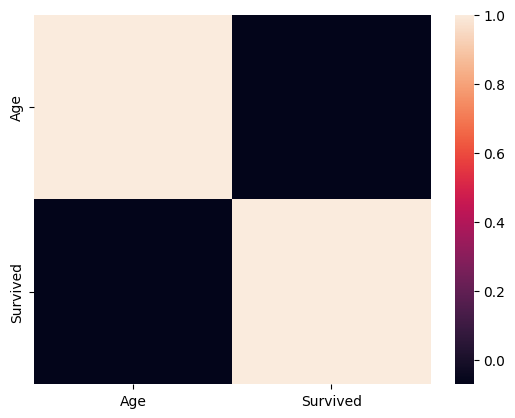

In [27]:

sns.heatmap(titanic_df[['Age', 'Survived']].corr())

(3 pts) Create a box and whisker plot for loan_amounts if using the Lending Club dataset and fare if using the Titanic dataset. How do you handle the null values? What does this box and whisker plot show you?


{'whiskers': [<matplotlib.lines.Line2D at 0x169a8bd90>,
 'caps': [<matplotlib.lines.Line2D at 0x169a9a340>,
 'boxes': [<matplotlib.lines.Line2D at 0x169a8baf0>],
 'medians': [<matplotlib.lines.Line2D at 0x169a9a880>],
 'fliers': [<matplotlib.lines.Line2D at 0x169a9ab20>],
 'means': []}

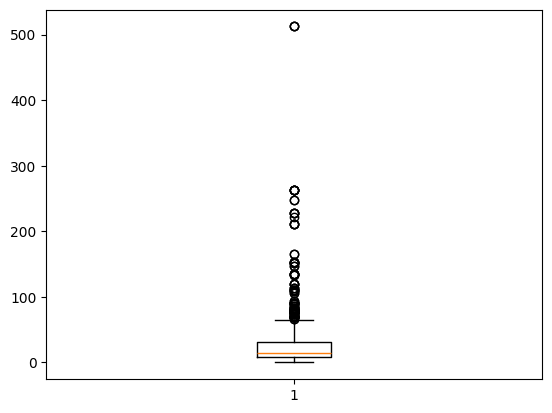

In [28]:
plt.boxplot(titanic_df['Fare'])
#I handled the null value by filling them with a space, so that the system will skip over those with no fare.
#The box and whisker plot shows that a majority of passengers paid less than $100 for their ticket, with a max of
#almost $500.

(5 pts) If using the Lending Club dataset: create a new column called region that uses a lambda and shows which part of the US someone lives in, split up into Pacific, Plains, Midwest, Northeast, and South. If using the Titanic dataset: create a new column called age_bin that groups people into at least 4 age ranges. 
Either use two different lambdas or a lambda and a different technique and see which one is more performant. Explain your findings in markdown. (use a timer to determine performance: check useful references below to see how timers work) 

I used two different lambdas and categorized the ages based on child, adult, and seniors. The reason I did this was because on the titanic, they were saving women and children only so it'll be easier for survival rate prediction.

In [29]:


titanic_df['age_bin'] = titanic_df['Age'].apply(lambda x: 'Child' if x <= 15 
                                                       else ('Adult' if x <= 30
                                                             else ('Adult' if x <= 45
                                                                    else 'Senior')))
titanic_df


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_1,Sex_2,Embarked_C,Embarked_Q,Embarked_S,age_bin
0,1,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,NaN,True,False,False,False,True,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,C85,False,True,True,False,False,Adult
2,3,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,NaN,False,True,False,False,True,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,C123,False,True,False,False,True,Adult
4,5,0,3,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,NaN,True,False,False,False,True,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.000000,0,0,211536,13.0000,NaN,True,False,False,False,True,Adult
887,888,1,1,"Graham, Miss. Margaret Edith",19.000000,0,0,112053,30.0000,B42,False,True,False,False,True,Adult
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,2,W./C. 6607,23.4500,NaN,False,True,False,False,True,Adult
889,890,1,1,"Behr, Mr. Karl Howell",26.000000,0,0,111369,30.0000,C148,True,False,True,False,False,Adult


(3 pts) If using the Lending Club dataset create subplot histograms to show if loan_amounts differ by region. If using the Titanic dataset, create subplot histograms to show how fares differ by age_bin. 
Summarize your findings in under 200 words.

I found that those who were older paid less than those who were younger. This could also be because the older people paid for their tickets while the younger children were probably in a higher class with their parents 

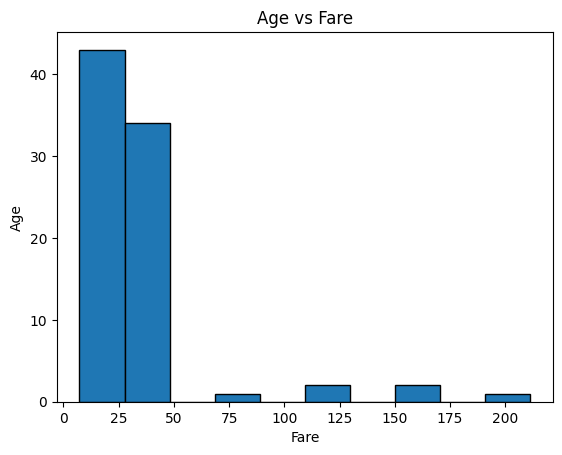

In [41]:
plt.hist(titanic_df[titanic_df['age_bin'] == age_bin]['Fare'], bins=10, edgecolor='black')
plt.xlabel("Fare")
plt.ylabel("Age")
plt.title("Age vs Fare")
plt.show()
